<a href="https://colab.research.google.com/github/ArovaSyams/machine_learning_svm/blob/main/support_vector_machine_365datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine for Mushroom Classifier

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Database


In [ ]:
mushroom_data = pd.read_csv("mushrooms-full-dataset.csv", dtype="str")
mushroom_data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# check if the sample is balance
mushroom_data["poisonous"].value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [ ]:
# check for missing value
mushroom_data.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Preprocessing

### Divide target and input

In [ ]:
target = mushroom_data["poisonous"]
input = mushroom_data.drop(["poisonous"], axis=1)

In [ ]:
# divide to train and test set
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=365, stratify=target)

In [ ]:
y_train.value_counts()

e    3366
p    3133
Name: poisonous, dtype: int64

In [ ]:
y_test.value_counts()

e    842
p    783
Name: poisonous, dtype: int64

### Define a separated encoding for target and input (label and attributes)

In [ ]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

### Apply the fit_transform to standardize data

In [ ]:
x_train_transform = enc_i.fit_transform(x_train)
x_test_transform = enc_i.fit_transform(x_test)

y_train_transform = enc_t.fit_transform(y_train)
y_test_transform = enc_t.fit_transform(y_test)

In [ ]:
# check the result
x_train_transform

array([[3., 3., 2., ..., 7., 1., 6.],
       [5., 3., 4., ..., 2., 5., 4.],
       [2., 0., 4., ..., 2., 4., 0.],
       ...,
       [2., 3., 2., ..., 7., 4., 0.],
       [3., 0., 8., ..., 7., 3., 1.],
       [5., 0., 3., ..., 3., 4., 0.]])

In [ ]:
y_train_transform

array([0, 0, 0, ..., 1, 0, 0])

## Rescaling

In [ ]:
#rescale the input (attributes) to scaled between (-1, 1)
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(x_train_transform)
x_train_rescaled = scaling.transform(x_train_transform)

In [ ]:
x_train_rescaled

array([[ 0.2       ,  1.        , -0.55555556, ...,  0.75      ,
        -0.6       ,  1.        ],
       [ 1.        ,  1.        , -0.11111111, ..., -0.5       ,
         1.        ,  0.33333333],
       [-0.2       , -1.        , -0.11111111, ..., -0.5       ,
         0.6       , -1.        ],
       ...,
       [-0.2       ,  1.        , -0.55555556, ...,  0.75      ,
         0.6       , -1.        ],
       [ 0.2       , -1.        ,  0.77777778, ...,  0.75      ,
         0.2       , -0.66666667],
       [ 1.        , -1.        , -0.33333333, ..., -0.25      ,
         0.6       , -1.        ]])

## Classification


In [ ]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C).fit(x_train_rescaled, y_train_transform)

In [ ]:
#predict with test set
y_pred_test = svc.predict(scaling.transform(x_test_transform))

## Analyze result

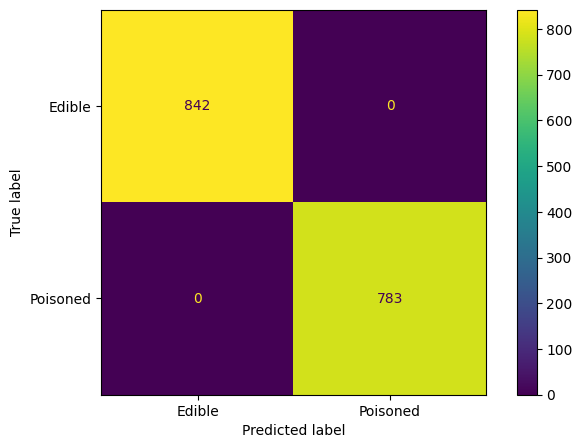

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transform, y_pred_test),
    display_labels=["Edible", "Poisoned"]
)

cmp.plot(ax=ax)

In [ ]:
print(classification_report(y_test_transform, y_pred_test, target_names=["Edible", "Poisoned"]))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
    Poisoned       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Hyperparameter Tuning

In [ ]:
tuned_parameter = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C": [1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
]

In [ ]:
clf = GridSearchCV(svm.SVC(), tuned_parameter)
clf.fit(x_train_rescaled, y_train_transform)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10], 'kernel': ['linear']},
                         {'C': [1, 10], 'kernel': ['poly']},
                         {'C': [1, 10], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
print(clf.best_params_)

{'C': 1, 'kernel': 'poly'}
